In [1]:
import matplotlib
import numpy as np
import pandas as pd
from Sloth import Sloth
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [2]:
# read and prepare data
Sloth = Sloth()
datapath = 'post_frequency_8.09_8.15.csv'
series = pd.read_csv(datapath,dtype='str',header=0)
X_train = series.values[:,1:]

# scaling can sometimes improve performance
#X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

n_samples = 100
X_train = X_train[:n_samples]
X_train = X_train.astype(np.float)
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]))
nrows,ncols = X_train.shape

print("DEBUG::shape of data for clustering:")
print(X_train.shape)

DEBUG::shape of data for clustering:
(100, 70)


The cluster frequencies are:
Counter({-1: 63, 1: 26, 0: 2, 3: 2, 4: 2, 6: 2, 2: 1, 5: 1, 7: 1})


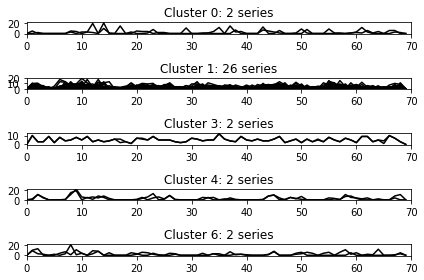

In [3]:
## this is the first clustering method variant, via dbscan
# some hyper-parameters
eps = 90
min_samples = 2
LOAD = True # Flag for loading similarity matrix from file if it has been computed before
if(LOAD):
    SimilarityMatrix = Sloth.LoadSimilarityMatrix()    
else:
    SimilarityMatrix = Sloth.GenerateSimilarityMatrix(X_train[:,1:])
    Sloth.SaveSimilarityMatrix(SimilarityMatrix)

nclusters, labels, cnt = Sloth.ClusterSimilarityMatrix(SimilarityMatrix,eps,min_samples)

print("The cluster frequencies are:")
print(cnt)

cnt_nontrivial = {x:cnt[x] for x in cnt if cnt[x]>1 and x!=-1}

plt.figure()
idx = 0
for yi in cnt_nontrivial.keys():
    plt.subplot(len(cnt_nontrivial), 1, 1 + idx)
    for xx in X_train[labels == yi]:
        plt.plot(xx.ravel(), "k-")
    plt.xlim(0, ncols)
    plt.title("Cluster %d: %d series" %(yi,cnt[yi]))
    idx = idx+1

plt.tight_layout()
plt.show()
        

The hcluster frequencies are:
Counter({2: 63, -1: 30, 0: 3, 1: 2, 3: 2})


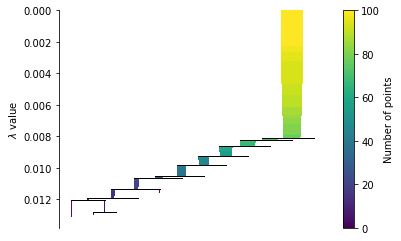

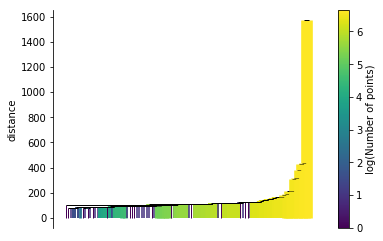

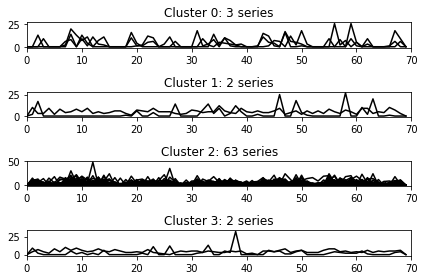

The hcluster frequencies are:
Counter({2: 63, -1: 30, 0: 3, 1: 2, 3: 2})


In [4]:
## try hierarchical clustering via hdbcan
nclusters, labels, cnt = Sloth.HClusterSimilarityMatrix(SimilarityMatrix,min_samples,PLOT=True)

print("The hcluster frequencies are:")
print(cnt)


cnt_nontrivial = {x:cnt[x] for x in cnt if cnt[x]>1 and x!=-1}

plt.figure()
idx = 0
for yi in cnt_nontrivial.keys():
    plt.subplot(len(cnt_nontrivial), 1, 1 + idx)
    for xx in X_train[labels == yi]:
        plt.plot(xx.ravel(), "k-")
    plt.xlim(0, ncols)
    plt.title("Cluster %d: %d series" %(yi,cnt[yi]))
    idx = idx+1

plt.tight_layout()
plt.show()

print("The hcluster frequencies are:")
print(cnt)

Init 1
146.016 --> 138.442 --> 137.769 --> 137.769 --> 
Init 2
151.000 --> 143.373 --> 140.623 --> 140.434 --> 140.356 --> 139.918 --> 137.916 --> 137.528 --> 137.031 --> 137.031 --> 
Init 3
152.913 --> 140.764 --> 136.279 --> 135.037 --> 134.441 --> 134.329 --> 134.301 --> 134.477 --> 134.691 --> 134.993 --> 135.168 --> 135.283 --> 135.283 --> 
Init 4
148.490 --> 140.174 --> 137.827 --> 137.632 --> 137.498 --> 137.498 --> 
Init 5
147.650 --> 139.528 --> 138.165 --> 137.006 --> 137.006 --> 
Init 6
151.832 --> 143.997 --> 136.990 --> 135.664 --> 135.312 --> 135.278 --> 135.278 --> 
Init 7
153.349 --> 142.021 --> 137.720 --> 135.876 --> 135.746 --> 135.699 --> 135.699 --> 
Init 8
149.070 --> 140.634 --> 139.162 --> 138.798 --> 138.563 --> 138.560 --> 138.494 --> 137.967 --> 137.016 --> 135.644 --> 135.247 --> 135.247 --> 
Init 9
152.825 --> 144.804 --> 137.677 --> 135.606 --> 135.264 --> 135.201 --> 135.141 --> 135.141 --> 
Init 10
150.296 --> 139.180 --> 136.643 --> 137.029 --> 136.941 

/home/azunre/.local/lib/python3.5/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


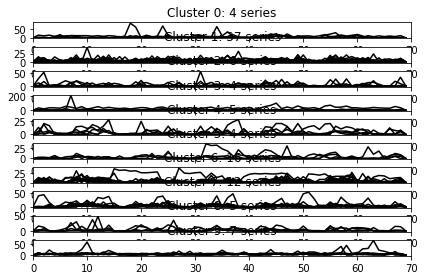

In [5]:
## this is another clustering method, using tslearn kmeans - number of clusters fixed by user
nclusters = 10
labels = Sloth.ClusterSeriesKMeans(X_train,nclusters)
nclusters = len(set(labels))-(1 if -1 in labels else 0)
from collections import Counter
cnt = Counter()
for label in list(labels):
    cnt[label] += 1

print("The k-means cluster frequencies are:")
print(cnt)

cnt_nontrivial = {x:cnt[x] for x in cnt if cnt[x]>1 and x!=-1}

plt.figure()
idx = 0
for yi in cnt_nontrivial.keys():
    plt.subplot(len(cnt_nontrivial), 1, 1 + idx)
    for xx in X_train[labels == yi]:
        plt.plot(xx.ravel(), "k-")
    plt.xlim(0, ncols)
    plt.title("Cluster %d: %d series" %(yi,cnt[yi]))
    idx = idx+1

plt.tight_layout()
plt.show()